In [1]:
%load_ext autoreload
%autoreload 2

## step1 create signal 

In [2]:
from auto import expr_generator
pe = expr_generator.ExprGenerator()

/home/fbillion/Kitkit/auto/expr_generator.py:40: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  self.prob_yaml = yaml.load(ff)
/home/fbillion/Kitkit/auto/expr_generator.py:40: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  self.prob_yaml = yaml.load(ff)


In [3]:
from auto import expr_mongo 
db = expr_mongo.ExprDB()
for i in range(1000):
    db.write_mongodb(pe.get_one_expr(1))

[ExprGenerator] layer:1 expr:ts_rank(ClosePrice,10)
[ExprDB] mongodb insert layer:1 expr:ts_rank(ClosePrice,10)
[ExprGenerator] layer:1 expr:correlation(VWAP,OpenPrice,15)
[ExprDB] mongodb insert layer:1 expr:correlation(VWAP,OpenPrice,15)
[ExprGenerator] layer:1 expr:var(LowestPrice,100)
[ExprDB] mongodb insert layer:1 expr:var(LowestPrice,100)
[ExprGenerator] layer:1 expr:ts_count(VWAP,20)
[ExprDB] mongodb insert layer:1 expr:ts_count(VWAP,20)
[ExprGenerator] layer:1 expr:stddev(VolChg,40)
[ExprDB] mongodb insert layer:1 expr:stddev(VolChg,40)
[ExprGenerator] layer:1 expr:nike(Return)
[ExprDB] mongodb insert layer:1 expr:nike(Return)
[ExprGenerator] layer:1 expr:var(ClosePrice,80)
[ExprDB] mongodb insert layer:1 expr:var(ClosePrice,80)
[ExprGenerator] layer:1 expr:arccosh(Return)
[ExprDB] mongodb insert layer:1 expr:arccosh(Return)
[ExprGenerator] layer:1 expr:k_moment(Return,60,2)
[ExprDB] mongodb insert layer:1 expr:k_moment(Return,60,2)
[ExprGenerator] layer:1 expr:sinh(HighestPri

In [50]:

    #step 1 data------------------------------------------------------------------------------------
    from data.pricevolume import PriceVolume
    pv = PriceVolume(path=backtest_conf['data_path'])
    pv.build()

    #step2 resample------------------------------------------------------------------------------------
    from data.resample import Resample
    rs = Resample(IS_start=backtest_conf['backtest_start'], IS_end=backtest_conf['backtest_end'])
    IS_Data = rs.build(pv)


    #step3 alpha------------------------------------------------------------------------------------
    ClosePrice = IS_Data.ClosePrice
    OpenPrice = IS_Data.OpenPrice
    HighestPrice = IS_Data.HighestPrice
    LowestPrice = IS_Data.LowestPrice
    Volume = IS_Data.Volume
    VWAP = IS_Data.VWAP
    Return = IS_Data.Return
    VolChg = IS_Data.VolChg


    alpha = eval(exprDict['expr'])
    exprDict['cal_error'] = None

    #step4 deal------------------------------------------------------------------------------------
    from traders.open_deal import OpenDeal
    dealObj=OpenDeal(IS_Data, alpha=alpha, maxlookback=backtest_conf['maxlookback'])
    dealObj.build()


    #step5 performance------------------------------------------------------------------------------------
    from evaluators.alpha_perform import AlphaPerform
    ap = AlphaPerform(dealObj, 
                      cost=backtest_conf['cost'], 
                      cycle=backtest_conf['cycle'], 
                      quintiles_num=backtest_conf['quintiles'], 
                      figure=False,
                      stat_info=True)
    ap.build()

    print('[layer%s] %s calculating ...' %(exprDict['layer'], exprDict['expr']))
    exprDict.update(ap.indicators)
    exprDict['backtest'] = 'Done'
    return exprDict


In [51]:
Backtester(expr_dict)

[data][pricevolume.py]/home/fbillion/15min/ticker_names.npy
[data][pricevolume.py]/home/fbillion/15min/dates.npy
[data][pricevolume.py]/home/fbillion/15min/OpenPrice.npy
[data][pricevolume.py]/home/fbillion/15min/ClosePrice.npy
[data][pricevolume.py]/home/fbillion/15min/HighestPrice.npy
[data][pricevolume.py]/home/fbillion/15min/LowestPrice.npy
[data][pricevolume.py]/home/fbillion/15min/Volume.npy
[data][pricevolume.py]/home/fbillion/15min/VWAP.npy
[data][pricevolume.py]/home/fbillion/15min/TradeStatus.npy
[data][pricevolume.py]/home/fbillion/15min/Return.npy
[data][pricevolume.py]/home/fbillion/15min/VolChg.npy
[data][resample] IS start:2019-07-01 09:30:00 end:2019-12-23 14:15:00
[AlphaPerform] start:2019-07-18 10:45:00 end:2019-12-23 14:15:00
   Alpha Turnover  Alpha PNL  Net Alpha PNL  Alpha Sharpe  Net Alpha Sharpe  \
            0.024      0.079          0.079         4.344             4.344   

   Alpha Max Drawdown  Alpha Max DrawdownPeriod  Net Alpha Max Drawdown  \
           

{'expr': 'tanh(ema(tema(OpenPrice,10),10))',
 'layer': 3,
 'create_date': '2020-02-10 11:02:56',
 'backtest': 'Done',
 'backtest_start': '2019-07-01',
 'backtest_end': '2019-11-01',
 'data_path': '/home/fbillion/15min/',
 'maxlookback': 200,
 'quintiles': 5,
 'cost': 0.0,
 'cycle': '15MIN',
 'cal_error': None,
 'Alpha Turnover': 0.024,
 'Alpha PNL': 0.079,
 'Net Alpha PNL': 0.079,
 'Alpha Sharpe': 4.344,
 'Net Alpha Sharpe': 4.344,
 'Alpha Max Drawdown': 0.026,
 'Alpha Max DrawdownPeriod': 362,
 'Net Alpha Max Drawdown': 0.026,
 'Net Alpha Max DrawdownPeriod': 362,
 'Alpha Rsquared': 0.798}

## step1 data 

In [2]:
from data.pricevolume import PriceVolume
pv = PriceVolume(path='/home/fbillion/15min/')
pv.build()

/home/fbillion/15min/ticker_names.npy
/home/fbillion/15min/dates.npy
/home/fbillion/15min/OpenPrice.npy
/home/fbillion/15min/ClosePrice.npy
/home/fbillion/15min/HighestPrice.npy
/home/fbillion/15min/LowestPrice.npy
/home/fbillion/15min/Volume.npy
/home/fbillion/15min/Amount.npy
/home/fbillion/15min/VWAP.npy
/home/fbillion/15min/TradeStatus.npy


In [3]:
print(pv.dates[0], pv.dates[-1])

2019-07-01 09:30:00 2019-12-23 14:30:00


## step 2 resample

In [4]:
from data.resample import Resample
rs = Resample(IS_start='2019-08-08', IS_end='2019-12-20', OOS_start='2019-11-01', OOS_end='2019-12-23', IS_OOS_ratio=None)
IS_Data, OOS_Data = rs.build(pv)

['2019-07-01 09:30:00' '2019-07-01 09:45:00' '2019-07-01 10:00:00' ...
 '2019-12-23 14:00:00' '2019-12-23 14:15:00' '2019-12-23 14:30:00']
420 1244 1784
IS start:2019-08-08 09:30:00 end:2019-10-31 14:15:00
OOS start:2019-10-31 14:30:00 end:2019-12-20 14:15:00


## step 3 alpha

In [5]:
from alpha.alpha_101 import Alpha_101
alpha = Alpha_101()
alpha = alpha.build(IS_Data)

## step 4 Deal 

In [6]:
from traders.open_deal import OpenDeal
p=OpenDeal(IS_Data, alpha, 50, 1)
p.build()

## step 5 performace

In [7]:
from evaluators.original_perform import OriginalPerform
op = OriginalPerform(p, cost=0.0001)
op.build()

/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


/home/fbillion/Kitkit/evaluators/alpha_perform.py:76: RuntimeWarning: invalid value encountered in less_equal
  res[rank_wgts <= bottom_num] = np.nan
/home/fbillion/Kitkit/evaluators/alpha_perform.py:77: RuntimeWarning: invalid value encountered in greater
  res[rank_wgts > up_num] = np.nan


start:2019-08-13 10:45:00 end:2019-10-31 14:15:00
   Alpha Turnover  Alpha PNL  Net Alpha PNL  Alpha Sharpe  Net Alpha Sharpe  \
            0.534     -0.007         -0.049        -0.964            -6.516   

   Alpha Max Drawdown  Alpha Max DrawdownPeriod  Net Alpha Max Drawdown  \
                0.024                       545                   0.057   

   Net Alpha Max DrawdownPeriod  Alpha Rsquared  
                            774           0.327  


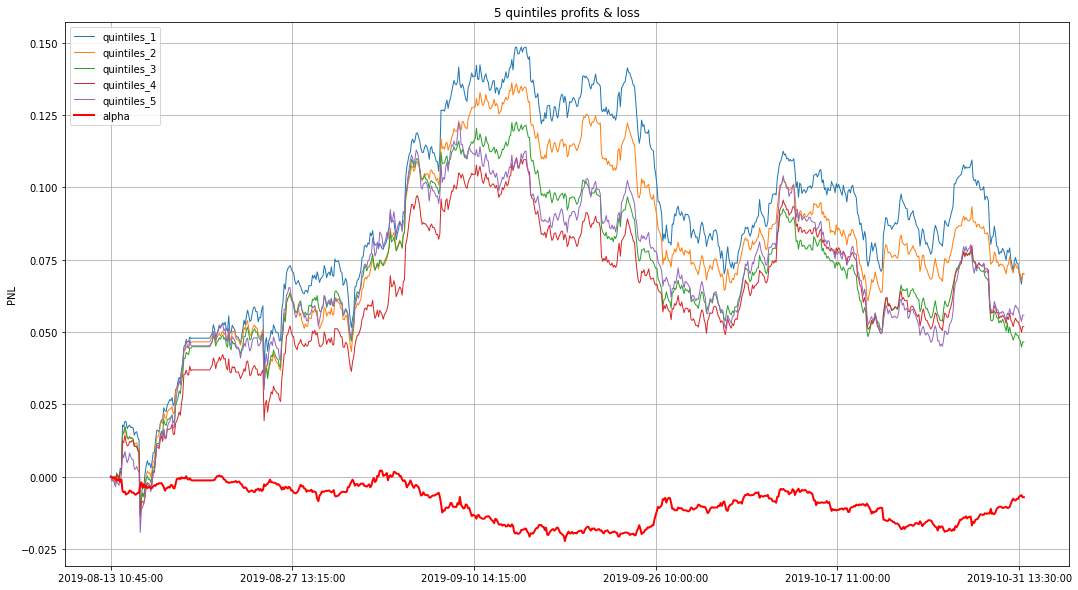

In [8]:
%matplotlib inline
from evaluators.alpha_perform import AlphaPerform
ap = AlphaPerform(p, cost=0.0001, cycle='15MIN', quintiles_num=5)
ap.build()



(775,) (775,)


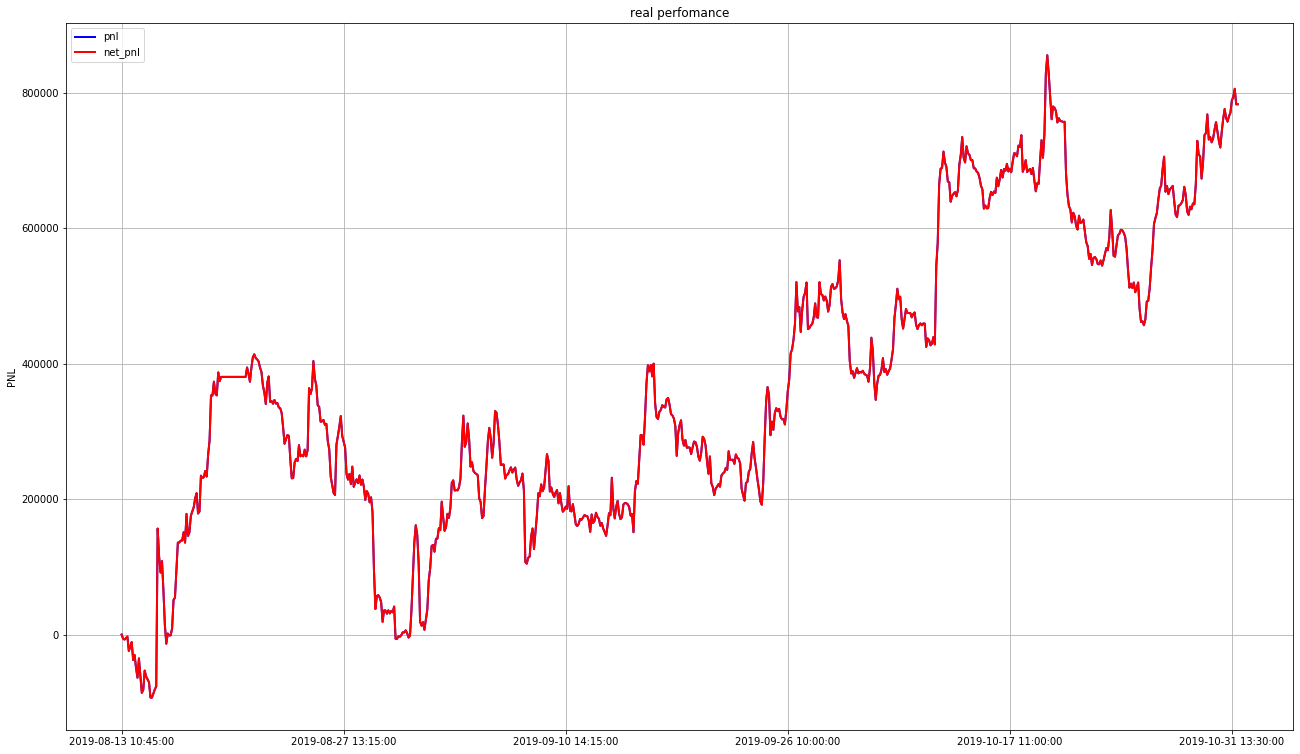

In [9]:
%matplotlib inline
from evaluators.real_perform import RealPerform
ap = RealPerform(p, capital=10e7, cost=0.000)
ap.build()

In [14]:
ap.position[0] * p.resample_tradeprice

array([[  263907.,  -158579.,   -23632., ...,   -47320.,   200004.,
        -1191106.],
       [  263907.,  -158122.,   -23576., ...,   -47096.,   200004.,
        -1180378.],
       [  263376.,  -158579.,   -23632., ...,   -47124.,   200200.,
        -1187530.],
       ...,
       [  277713.,  -157208.,   -25592., ...,   -53424.,   237608.,
        -2112224.],
       [  276120.,  -156751.,   -25480., ...,   -53116.,   237580.,
        -2115502.],
       [  277182.,  -157208.,   -25592., ...,   -53480.,   238504.,
        -2133382.]])

In [20]:
p.resample_tradeprice

array([[ 4.94,  3.54,  4.27, ..., 16.89, 69.81, 41.62],
       [ 4.95,  3.54,  4.26, ..., 16.85, 70.05, 41.29],
       [ 4.95,  3.53,  4.27, ..., 16.82, 70.14, 41.4 ],
       ...,
       [ 5.23,  3.44,  4.57, ..., 19.08, 84.81, 70.95],
       [ 5.19,  3.43,  4.54, ..., 19.  , 84.81, 70.5 ],
       [ 5.22,  3.43,  4.58, ..., 19.14, 85.25, 71.68]])